# SEA JCLplus+ JCL Defects Metrics Analysis Notebook

## Description

This notebook reads the JCLplus+ Global Record, performs a descriptive analysis of JCL defects and calculate global defects indices.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
          <a href="#business">1. Business Understanding</a><br>
          <a href="#prep">2. Data Preparation</a>
              <ul>
                <li><a href="read">Data Acuisition - JCLplus+ Global Record</a></li>
                <li><a href="transform">Perform Transformations</a></li>
                <li><a href="info">Records Information</a></li>
              </ul>
          <a href="#business">3. Analytic Approach</a><br>
            <ul>
                <li><a href="desc">Descriptive Analysis</a></li>
                <li><a href="index">Indices</a></li>
                <li><a href="visual">Data Visualization</a></li>
                   <ul>
                    <li><a href="def">Total Defects by Error Type</a></li>
                    <li><a href="def_date">Total Defects by Date</a></li>
                   </ul>    
              </ul>
         
                
</div>

<hr>

<h2> 1. Business Understanding</h2>

JCLplus+ is equipped with an engine that not only produces Summary defect reports but also generates two typles of records(comma-separated CSV format) with significant information that can be easily imported by any RDBMS, spreadsheet or other reporting system. 

The global statistics record offers information of the overall quality of the JCL change process and the problems captured by the rules defined in the product.      
                                     	
This set of metrics can help to determine a course of action to identify categories and priorities of repetitive problems that may impact the time to delivery of JCL components. These rates can also serve as a baseline for benchmarking purposes and validate the proper adoption of Best Practices procedures. These reports can also be broken down by failure type and by promotion stage within the SCM.


<h2> 2. Data Preparation</h2>

In [1]:
# Importing Pandas Library
import pandas as pd

#Importing other Libraries
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### _Read JCLplus+ Global File_
_Note: Change the path of the JClplus+ Global CSV file_

In [2]:
jpg=pd.read_csv('C:\\sea\\logstash-6.0.1\\data\\jpglobal.csv',header=None,keep_default_na=False)
jpg.columns=['sdate', 'stime', 'edate', 'etime','jobname', 'stepname' , 
             'smfid', 'rel', 'userid', 'mode', 'rules', 'warn', 'error', 'stmtserr',
             'rc', 'ruleds',  'rulename', 'rexxrule', 'exitrule',
             'totalmembers', 'totaljobs']

In [3]:
jpg.sdate=jpg.sdate.astype('datetime64[ns]')
jpg.edate=jpg.edate.astype('datetime64[ns]')

### _Exploratory Data Analysis_

In [4]:
jpg.head()

,sdate,stime,edate,etime,jobname,stepname,smfid,rel,userid,mode,...,warn,error,stmtserr,rc,ruleds,rulename,rexxrule,exitrule,totalmembers,totaljobs
0,2018-08-09,9:27:09,2018-08-09,9:27:10,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,4,2,3,0,JRC1.SEAUSER.DEMO.PARMLIB,STATS,**NA**,**NA**,1,1
1,2018-08-09,9:44:43,2018-08-09,9:44:54,SEAUSERC,JCLPLUS,JRCM,4.4G,SEAUSER,BATCH,...,181,277,267,8,JRC1.SEAUSER.DEMO.PARMLIB,STATS,**NA**,**NA**,1,1
2,2018-08-09,15:04:33,2018-08-09,15:04:52,SEAUSERB,JCLPLUS,JRCM,4.4G,SEAUSER,BATCH,...,365,392,449,8,JRC1.SEAUSER.DEMO.PARMLIB,STATS,**NA**,**NA**,34,23
3,2018-08-09,15:08:17,2018-08-09,15:08:17,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,2,2,3,0,JRC1.SEAUSER.DEMO.PARMLIB,STATS,**NA**,**NA**,1,1
4,2018-08-09,15:08:35,2018-08-09,15:08:38,SEAUSER,ISPFPROC,JRCM,4.4G,SEAUSER,EDIT,...,2,2,3,0,JRC1.SEAUSER.DEMO.PARMLIB,STATS,**NA**,**NA**,1,1


In [5]:
a=jpg.shape
print('The Dimension of the JCLplus+ Global Dataframe is',a)


The Dimension of the JCLplus+ Global Dataframe is (13, 21)


In [6]:
date_min=jpg['sdate'].min()
date_max=jpg['sdate'].max()
print('Data Collected between ',date_min,' to ',date_max)

Data Collected between  2018-08-09 00:00:00  to  2018-10-18 00:00:00


In [7]:
jpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 21 columns):
sdate           13 non-null datetime64[ns]
stime           13 non-null object
edate           13 non-null datetime64[ns]
etime           13 non-null object
jobname         13 non-null object
stepname        13 non-null object
smfid           13 non-null object
rel             13 non-null object
userid          13 non-null object
mode            13 non-null object
rules           13 non-null int64
warn            13 non-null int64
error           13 non-null int64
stmtserr        13 non-null int64
rc              13 non-null int64
ruleds          13 non-null object
rulename        13 non-null object
rexxrule        13 non-null object
exitrule        13 non-null object
totalmembers    13 non-null int64
totaljobs       13 non-null int64
dtypes: datetime64[ns](2), int64(7), object(12)
memory usage: 2.3+ KB


<h2> 2. Analytic Approach</h2>

In [8]:
jpg[['rules', 'error', 'stmtserr',  'totalmembers', 'totaljobs']].describe()

,rules,error,stmtserr,totalmembers,totaljobs
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,93.230769,109.769231,141.461538,7.461538,6.461538
std,170.283662,146.632280,182.720011,13.351750,11.594650
min,0.000000,0.000000,2.000000,1.000000,0.000000
25%,0.000000,2.000000,3.000000,1.000000,1.000000
50%,4.000000,2.000000,13.000000,1.000000,1.000000
75%,17.000000,275.000000,291.000000,7.000000,7.000000
max,414.000000,392.000000,449.000000,40.000000,39.000000


### _Global Indices_

- At a higher lever these indices provide significant information for major release, application forecast, massive changes, scheduler setups and other events

- Detailed record offers more information to categorize defects' source, type and frequency 


In [9]:
# Calculate and round indices
tot_err=jpg['error'].sum()
tot_rul=jpg['rules'].sum()
tot_job=jpg['totaljobs'].sum()
tot_stm=jpg['stmtserr'].sum()
tot_war=jpg['warn'].sum()

def_job=(tot_err+tot_rul)/tot_job
def_job=int(def_job)

stm_job=tot_stm/tot_job 
stm_job=int(stm_job)

cri_job=tot_err/tot_job
cri_job=int(cri_job)

rul_job=tot_rul/tot_job
rul_job=int(rul_job)

# print Indices
print('Index1 - Number of JCL Defects per Job       = ',def_job)
print('Index2 - Number of Defect-Stmt per Job       = ',stm_job)
print('Index3 - Number of Critical-Defects  per Job = ',cri_job)
print('Index4 - Number of Standards-Defects per Job = ',rul_job)

Index1 - Number of JCL Defects per Job       =  31
Index2 - Number of Defect-Stmt per Job       =  21
Index3 - Number of Critical-Defects  per Job =  16
Index4 - Number of Standards-Defects per Job =  14


### _Total Summary by Date_

In [10]:
jpg1=jpg.groupby(['sdate']).agg('sum')
print(jpg1)

            rules  warn  error  stmtserr  rc  totalmembers  totaljobs
sdate                                                                
2018-08-09      0   554    675       725  16            38         27
2018-08-16    845   392    550       791  16            15         15
2018-08-17    355   145    200       316   8            43         41
2018-10-18     12     4      2         7   0             1          1


In [11]:
jpg2=jpg.groupby(['sdate']).agg({'error' : ['min','max','sum']})
jpg3=jpg.groupby(['sdate']).agg({'rules' : ['min','max','sum']})
print('-------------------------------------------')
print(jpg2)
print('-------------------------------------------')
print(jpg3)

-------------------------------------------
           error          
             min  max  sum
sdate                     
2018-08-09     2  392  675
2018-08-16     0  275  550
2018-08-17     2  181  200
2018-10-18     2    2    2
-------------------------------------------
           rules          
             min  max  sum
sdate                     
2018-08-09     0    0    0
2018-08-16    17  414  845
2018-08-17     0  343  355
2018-10-18    12   12   12


### _Data Visualization_

#### _Number of Defects by Error Type_

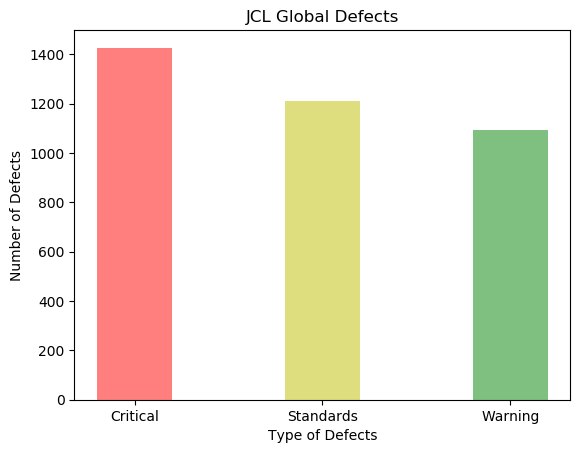

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Plot the data:
my_colors = 'ryg'  #red, green, blue, black, etc.
objects = ('Critical', 'Standards', 'Warning')
y_pos = np.arange(len(objects))
defects = [tot_err, tot_rul, tot_war]
plt.bar(y_pos, defects, align='center', alpha=0.5,width=0.4, color=my_colors)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Defects')
plt.xlabel('Type of Defects')
plt.title('JCL Global Defects')

plt.show()

#### _Number of Defects by Date_

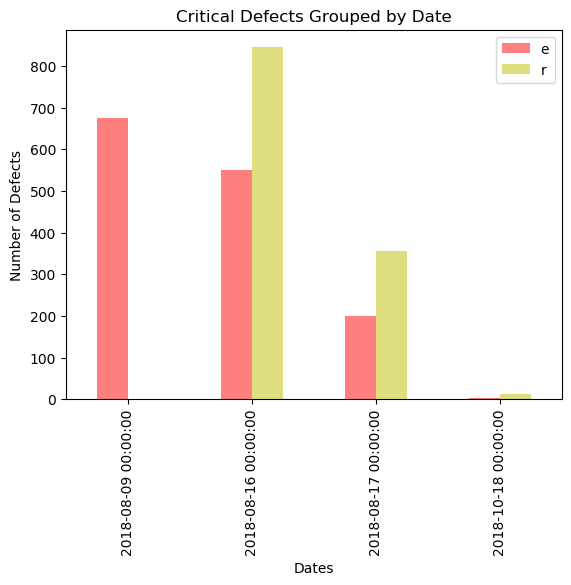

            rules  warn  error  stmtserr  rc  totalmembers  totaljobs
sdate                                                                
2018-08-09      0   554    675       725  16            38         27
2018-08-16    845   392    550       791  16            15         15
2018-08-17    355   145    200       316   8            43         41
2018-10-18     12     4      2         7   0             1          1


In [14]:
jpg_daily=jpg.groupby('sdate').agg(['sum']).reset_index()

jpg_daily.plot(x='sdate', y=(['error','rules']),kind="bar",color="ry",legend=None,alpha=0.5)
plt.title('Critical Defects Grouped by Date')
plt.ylabel('Number of Defects')
plt.xlabel('Dates')
plt.legend('error')
plt.show()
jpg1=jpg.groupby(['sdate']).agg('sum')
print(jpg1)